<a href="https://colab.research.google.com/github/decoteau2/MA_Housing_Rent_Analysis/blob/main/01_EDA_MA_Housing_Rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Massachusetts Housing Rent Analysis**
### **Exploratory Data Analysis & Preprocessing (PUMS 2019–2023)**



This project analyzes housing rent patterns in Massachusetts using Public Use Microdata Sample (PUMS) data from 2019–2023. The analysis explores how household size, housing characteristics, and tenure relate to monthly rent levels, with the goal of generating insights relevant to housing affordability and policy considerations.


In [ ]:
# Core libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

# Interactive plots
!pip install plotly


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
import os

try:
    drive.mount('/content/drive')
except Exception as e:
    print("Error mounting drive:", e)

# Step 2: Define base project folder
base_dir = '/content/drive/MyDrive/MA_Housing_Rent_Analysis'
data_dir = os.path.join(base_dir, 'data')

# Step 3: Create folders
subfolders = ['data', 'notebooks', 'visualizations', 'reports']
for folder in subfolders:
    path = os.path.join(base_dir, folder)
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Created folder: {path}")
    else:
        print(f"Folder already exists: {path}")

# Step 4: List files in the data folder to check if CSV is present
if os.path.exists(data_dir):
    files = os.listdir(data_dir)
    print("Files in data folder:", files)
else:
    print("Data folder does not exist yet. Upload csv_hak.csv to this folder.")

# Step 5: Load CSV if it exists
csv_path = os.path.join(data_dir, 'csv_hak.csv')
if os.path.exists(csv_path):
    import pandas as pd
    df = pd.read_csv(csv_path)
    print("CSV loaded successfully! Here are the first 5 rows:")
    display(df.head())
    print("\nData info:")
    df.info()
    print("\nSummary statistics:")
    display(df.describe())
else:
    print("csv_hak.csv not found. Please upload it to the data folder.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder already exists: /content/drive/MyDrive/MA_Housing_Rent_Analysis/data
Folder already exists: /content/drive/MyDrive/MA_Housing_Rent_Analysis/notebooks
Folder already exists: /content/drive/MyDrive/MA_Housing_Rent_Analysis/visualizations
Folder already exists: /content/drive/MyDrive/MA_Housing_Rent_Analysis/reports
Files in data folder: ['cleaned_psam_h02.csv']
csv_hak.csv not found. Please upload it to the data folder.


In [ ]:
data_dir = '/content/drive/MyDrive/MA_Housing_Rent_Analysis/Data'


In [ ]:
import os
import zipfile
import pandas as pd

# Step 1: Correct folder path
data_dir = '/content/drive/MyDrive/MA_Housing_Rent_Analysis/Data'

# Step 2: List files in folder
print("Files in Data folder before extraction:", os.listdir(data_dir))

# Step 3: Extract the ZIP
zip_path = os.path.join(data_dir, 'csv_hak (1).zip')
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)  # Extract into the same folder

print("Files in Data folder after extraction:", os.listdir(data_dir))

# Step 4: Load the CSV inside the ZIP (psam_h02.csv)
csv_path = os.path.join(data_dir, 'psam_h02.csv')  # adjust if it has a slightly different name
df = pd.read_csv(csv_path)

print("CSV loaded successfully! Here are the first 5 rows:")
display(df.head())
print("\nData info:")
df.info()
print("\nSummary statistics:")
display(df.describe())


Files in Data folder before extraction: ['csv_hak (1).zip', 'psam_h02.csv', 'ACS2019_2023_PUMS_README.pdf']
Files in Data folder after extraction: ['csv_hak (1).zip', 'psam_h02.csv', 'ACS2019_2023_PUMS_README.pdf']
CSV loaded successfully! Here are the first 5 rows:


,RT,SERIALNO,DIVISION,PUMA,REGION,STATE,ADJHSG,ADJINC,WGTP,NP,...,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80
0,H,2019GQ0000410,9,400,4,2,1195583,1207712,0,1,...,0,0,0,0,0,0,0,0,0,0
1,H,2019GQ0000600,9,101,4,2,1195583,1207712,0,1,...,0,0,0,0,0,0,0,0,0,0
2,H,2019GQ0000842,9,200,4,2,1195583,1207712,0,1,...,0,0,0,0,0,0,0,0,0,0
3,H,2019GQ0000998,9,102,4,2,1195583,1207712,0,1,...,0,0,0,0,0,0,0,0,0,0
4,H,2019GQ0001073,9,102,4,2,1195583,1207712,0,1,...,0,0,0,0,0,0,0,0,0,0



Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19210 entries, 0 to 19209
Columns: 237 entries, RT to WGTP80
dtypes: float64(145), int64(90), object(2)
memory usage: 34.7+ MB

Summary statistics:


,DIVISION,PUMA,REGION,STATE,ADJHSG,ADJINC,WGTP,NP,TYPEHUGQ,ACCESSINET,...,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80
count,19210.0,19210.000000,19210.0,19210.0,1.921000e+04,1.921000e+04,19210.000000,19210.000000,19210.000000,11482.000000,...,19210.000000,19210.000000,19210.000000,19210.000000,19210.000000,19210.000000,19210.000000,19210.000000,19210.000000,19210.000000
mean,9.0,273.412962,4.0,2.0,1.107387e+06,1.130746e+06,17.054138,1.729412,1.253722,1.228009,...,17.044612,17.052264,17.052056,17.048777,17.049870,17.053826,17.062624,17.048308,17.055075,17.045549
std,0.0,112.802846,0.0,0.0,7.670042e+04,6.999678e+04,25.688718,1.782801,0.626159,0.618719,...,28.948421,29.037896,29.062689,29.266010,29.096052,29.313518,29.268125,28.875290,29.025256,29.420952
min,9.0,101.000000,4.0,2.0,1.000000e+06,1.019518e+06,0.000000,0.000000,1.000000,1.000000,...,-12.000000,-8.000000,-2.000000,-18.000000,-5.000000,-17.000000,-24.000000,-1.000000,-9.000000,-15.000000
25%,9.0,200.000000,4.0,2.0,1.041251e+06,1.085308e+06,3.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,9.0,300.000000,4.0,2.0,1.125501e+06,1.159185e+06,8.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
75%,9.0,400.000000,4.0,2.0,1.179884e+06,1.187140e+06,21.000000,2.000000,1.000000,1.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,19.000000,20.000000,20.000000,19.000000,20.000000
max,9.0,400.000000,4.0,2.0,1.195583e+06,1.207712e+06,456.000000,20.000000,3.000000,3.000000,...,452.000000,580.000000,522.000000,538.000000,721.000000,606.000000,617.000000,558.000000,539.000000,655.000000


## **2.2 Data Cleaning & Preprocessing**


In [ ]:
import pandas as pd
import numpy as np

# -----------------------------
# Step 1: Replace negative/missing codes with NaN for numeric columns
# -----------------------------
numeric_cols = ['MRGP', 'NP', 'BDSP', 'BATH']
for col in numeric_cols:
    df[col] = df[col].apply(lambda x: x if x >= 0 else pd.NA)

# -----------------------------
# Step 2: Drop rows where target MRGP is missing
# -----------------------------
df = df.dropna(subset=['MRGP'])

# -----------------------------
# Step 3: Fill missing numeric values with median
# -----------------------------
df['NP'] = df['NP'].fillna(df['NP'].median())
df['BDSP'] = df['BDSP'].fillna(df['BDSP'].median())
df['BATH'] = df['BATH'].fillna(df['BATH'].median())

# -----------------------------
# Step 4: Encode categorical variables
# -----------------------------
categorical_cols = ['TYPEHUGQ', 'BLD', 'ACCESSINET', 'TEN']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# -----------------------------
# Step 5: Create derived feature: Rent per person
# -----------------------------
df_encoded['Rent_per_person'] = df_encoded['MRGP'] / df_encoded['NP']

# -----------------------------
# Step 6: Quick check
# -----------------------------
print("Data cleaned successfully!")
print("Shape after cleaning:", df_encoded.shape)
display(df_encoded.head())


Data cleaned successfully!
Shape after cleaning: (3981, 245)


/tmp/ipython-input-385539393.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BDSP'] = df['BDSP'].fillna(df['BDSP'].median())
/tmp/ipython-input-385539393.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BATH'] = df['BATH'].fillna(df['BATH'].median())


,RT,SERIALNO,DIVISION,PUMA,REGION,STATE,ADJHSG,ADJINC,WGTP,NP,...,BLD_4.0,BLD_5.0,BLD_6.0,BLD_7.0,BLD_8.0,BLD_9.0,BLD_10.0,ACCESSINET_2.0,ACCESSINET_3.0,Rent_per_person
534,H,2019HU0001507,9,102,4,2,1195583,1207712,34,4,...,False,False,False,False,False,False,False,False,False,600.0
538,H,2019HU0002548,9,300,4,2,1195583,1207712,134,4,...,False,False,False,False,False,False,False,False,False,450.0
543,H,2019HU0004008,9,400,4,2,1195583,1207712,7,2,...,False,False,False,False,False,False,False,True,False,50.0
549,H,2019HU0006662,9,200,4,2,1195583,1207712,59,2,...,False,False,False,False,False,False,False,False,False,700.0
556,H,2019HU0011150,9,102,4,2,1195583,1207712,27,5,...,False,False,False,False,False,False,False,False,False,140.0


In [ ]:
#SAVE TO GOOGLE DRIVE
cleaned_csv_path = '/content/drive/MyDrive/MA_Housing_Rent_Analysis/data/cleaned_psam_h02.csv'
df_encoded.to_csv(cleaned_csv_path, index=False)
print("Cleaned dataset saved to:", cleaned_csv_path)


Cleaned dataset saved to: /content/drive/MyDrive/MA_Housing_Rent_Analysis/data/cleaned_psam_h02.csv


## **2.1 Exploratory Data Analysis (EDA)**


This section explores the structure, distributions, and relationships within the cleaned PUMS housing dataset. Visualizations are based on the cleaned data and are used to understand rent patterns and key housing characteristics prior to model development.



### **2.1.1 Distribution of Monthly Gross Rent (MRGP)**


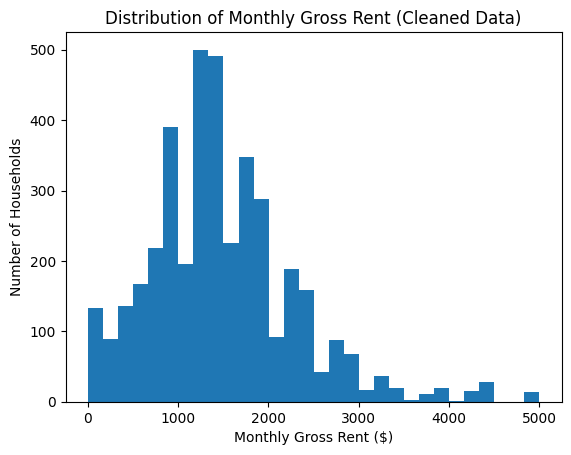

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df_encoded['MRGP'], bins=30)
plt.xlabel('Monthly Gross Rent ($)')
plt.ylabel('Number of Households')
plt.title('Distribution of Monthly Gross Rent (Cleaned Data)')
plt.show()


**Purpose:**
This visualization shows the distribution of monthly gross rent across renter-occupied households to understand the overall rent landscape and identify skewness or extreme values.

**Interpretation:**
The distribution is right-skewed, with most households clustered in the lower-to-middle rent ranges and a smaller number of households paying substantially higher rents. This indicates that while typical rents are moderate, high-rent units exist and may influence overall averages.

**Limitations:**
This plot does not explain why rents vary or how household or housing characteristics contribute to higher rents. Extreme values may also visually compress the main distribution.


### **2.1.2 Household Size (NP) vs Monthly Gross Rent (MRGP)**

<Figure size 640x480 with 0 Axes>

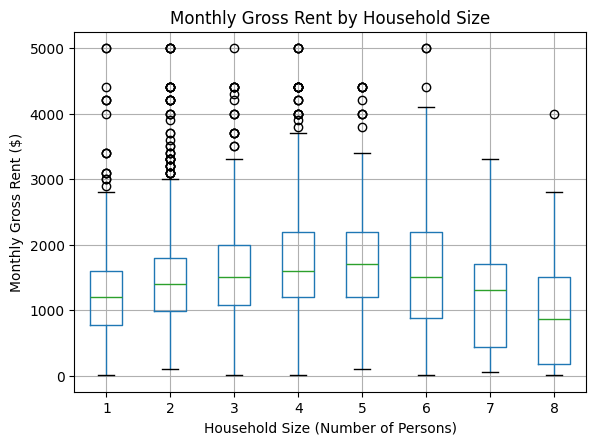

In [ ]:
import matplotlib.pyplot as plt

# Remove extreme household sizes to keep plot readable
eda_df = df_encoded[df_encoded['NP'] <= 8]

plt.figure()
eda_df.boxplot(column='MRGP', by='NP')
plt.xlabel('Household Size (Number of Persons)')
plt.ylabel('Monthly Gross Rent ($)')
plt.title('Monthly Gross Rent by Household Size')
plt.suptitle('')  # removes automatic pandas subtitle
plt.show()


**Purpose:**
This plot examines how monthly gross rent varies across different household sizes to assess whether larger households tend to pay higher total rent.

**Interpretation:**
Median rent generally increases with household size up to a point, suggesting that larger households often occupy higher-rent units. However, the relationship is not strictly linear, and variability increases for larger household sizes.

**Limitations:**
Household size alone does not account for housing quality or unit size. Larger households may live in shared or lower-quality housing, which this plot cannot distinguish.


### **2.1.3 Number of Bedrooms (BDSP) vs Rent per Person**

<Figure size 640x480 with 0 Axes>

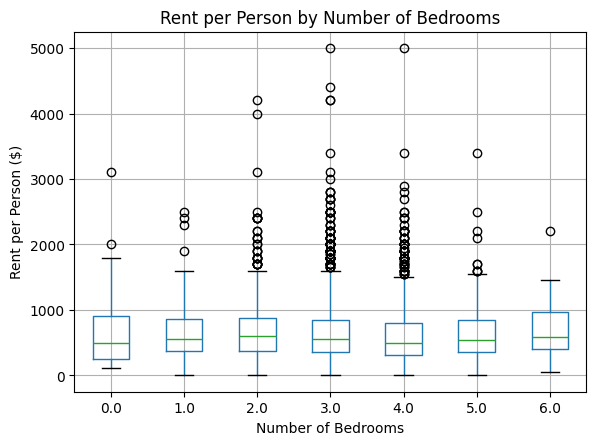

In [ ]:
import matplotlib.pyplot as plt

# Keep reasonable bedroom counts
eda_df = df_encoded[df_encoded['BDSP'] <= 6]

plt.figure()
eda_df.boxplot(column='Rent_per_person', by='BDSP')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent per Person ($)')
plt.title('Rent per Person by Number of Bedrooms')
plt.suptitle('')
plt.show()


**Purpose:**
This visualization compares rent per person across different bedroom counts to assess housing cost efficiency as unit size increases.

**Interpretation:**
Rent per person tends to be higher in units with fewer bedrooms and more variable in larger units. This suggests that cost-sharing plays an important role in affordability and that total rent alone does not fully reflect individual housing burden.

**Limitations:**
This plot does not account for differences in location, building quality, or household composition, which may also affect rent per person.


## **2.1.4 Housing Characteristics and Monthly Gross Rent**

This subsection explores how selected housing characteristics relate to monthly gross rent.
Boxplots are used to compare rent distributions across housing types, tenure status,
and building characteristics to identify patterns in housing costs.


### **2.1.4.1 Housing Type (TYPEHUGQ) vs Monthly Gross Rent**

<Figure size 640x480 with 0 Axes>

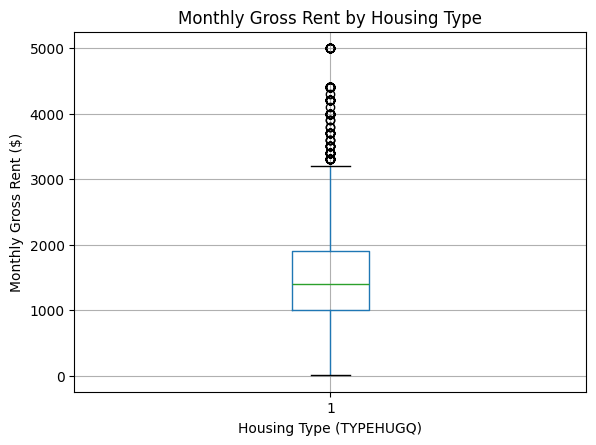

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column='MRGP', by='TYPEHUGQ')
plt.xlabel('Housing Type (TYPEHUGQ)')
plt.ylabel('Monthly Gross Rent ($)')
plt.title('Monthly Gross Rent by Housing Type')
plt.suptitle('')
plt.show()



**Purpose:**
This plot compares monthly gross rent across housing types to evaluate whether rent levels differ by structural housing category.

**Interpretation:**
Median rent and variability differ across housing types, indicating that housing structure is associated with rental costs. Some housing types show wider rent dispersion, suggesting greater variability in unit quality or location.

**Limitations:**
Some housing type categories contain few observations, limiting the reliability of comparisons across all categories.


### **2.1.4.2 Tenure Status (TEN) vs Monthly Gross Rent**

<Figure size 640x480 with 0 Axes>

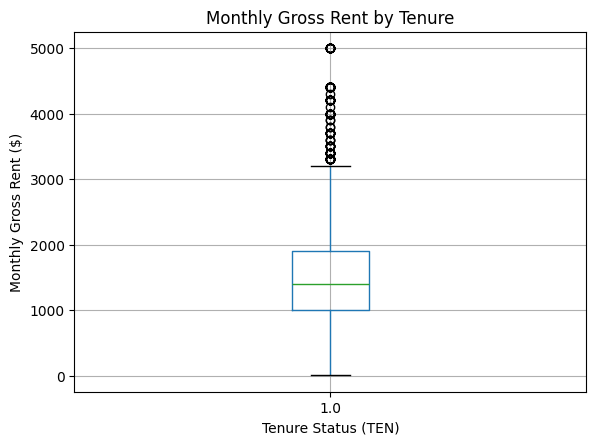

In [ ]:
plt.figure()
df.boxplot(column='MRGP', by='TEN')
plt.xlabel('Tenure Status (TEN)')
plt.ylabel('Monthly Gross Rent ($)')
plt.title('Monthly Gross Rent by Tenure')
plt.suptitle('')
plt.show()



**Purpose:**
This visualization examines rent distribution by tenure status to assess differences in housing costs within the rental market.

**Interpretation:**
Observed rent variation reflects differences among renter-occupied units, but meaningful comparisons across tenure types are limited due to the dataset’s focus on renters.

**Limitations:**
Because owner-occupied units are largely excluded, this plot cannot be used to compare rental and ownership housing costs.


### **2.1.4.3 Building Structure (BLD) vs Monthly Gross Rent**

<Figure size 640x480 with 0 Axes>

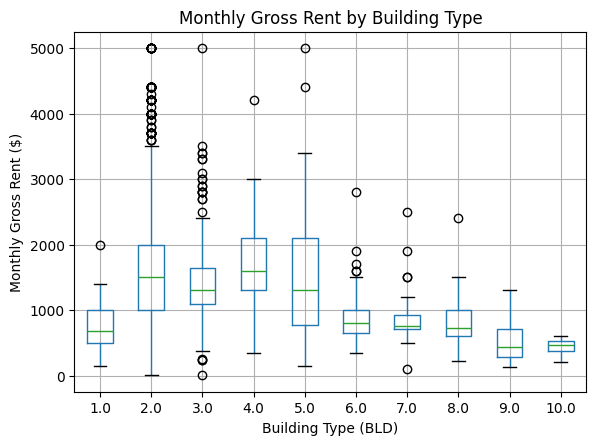

In [ ]:
plt.figure()
df.boxplot(column='MRGP', by='BLD')
plt.xlabel('Building Type (BLD)')
plt.ylabel('Monthly Gross Rent ($)')
plt.title('Monthly Gross Rent by Building Type')
plt.suptitle('')
plt.show()


**Purpose:**
This plot evaluates how monthly gross rent varies by building structure to identify patterns associated with housing density and building type.

**Interpretation:**
Larger or multi-unit building structures tend to show higher median rents and greater variability compared to smaller structures, suggesting an association between building density and rent levels.

**Limitations:**
Uneven category sizes and potential outliers may influence observed patterns, and the plot does not control for location or amenities.


### **2.1.5 Correlation Heatmap of Key Numeric Housing Variables**

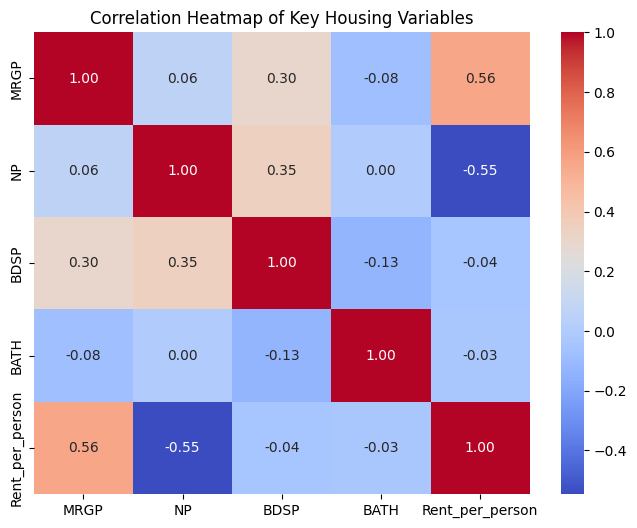

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the encoded dataframe that contains Rent_per_person
corr_vars = ['MRGP', 'NP', 'BDSP', 'BATH', 'Rent_per_person']

corr_df = df_encoded[corr_vars].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Key Housing Variables")
plt.show()


**Purpose:**
This heatmap summarizes the strength and direction of relationships among key numeric housing variables to identify potential predictors of rent.

**Interpretation:**
Monthly gross rent shows a moderate positive relationship with rent per person and number of bedrooms. Household size has little relationship with total rent but is strongly negatively related to rent per person, indicating cost-sharing effects. Bathroom count shows minimal correlation with rent.

**Limitations:**
Correlation does not imply causation, and relationships may be influenced by omitted variables such as location or housing quality.


### **2.1.6 Rent per Person Distribution by Number of Bedrooms**


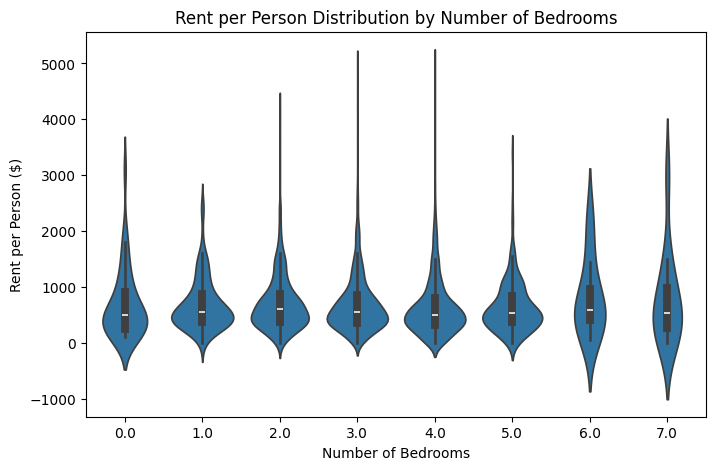

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.violinplot(
    x='BDSP',
    y='Rent_per_person',
    data=df_encoded
)

plt.title("Rent per Person Distribution by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Rent per Person ($)")
plt.show()


**Purpose:**
This visualization shows the distribution of rent per person across bedroom counts to highlight affordability differences by unit size.

**Interpretation:**
Smaller units tend to have higher rent per person, while larger units show wider distributions, reflecting variation in household size and cost-sharing arrangements. This reinforces that total rent alone does not capture individual housing burden.

**Limitations:**
This plot does not account for differences in neighborhood, building quality, or income levels, which may also affect affordability.


### **2.1.7 Data Quality Observations and Anomalies**

Several data quality considerations and anomalies were identified during exploratory analysis. The distribution of monthly gross rent (MRGP) is right-skewed, with a small number of households reporting substantially higher rents than the majority of observations. These extreme values appear as outliers in boxplots and long tails in the histogram and violin plots.

Household size (NP) and number of bedrooms (BDSP) include some infrequent or extreme categories. To maintain readability and interpretability of visualizations, household sizes greater than eight persons and bedroom counts greater than six were excluded from selected plots. This filtering was applied only for visualization purposes and does not alter the underlying dataset used for modeling.

Certain categorical variables, such as housing type (TYPEHUGQ) and building structure (BLD), contain categories with relatively few observations. As a result, rent distributions for these categories exhibit high variability and may not reliably represent broader housing market patterns.

Additionally, the tenure variable (TEN) is dominated by renter-occupied households due to the study’s focus on rental units. This limits the ability to compare rent distributions across different tenure types and should be considered when interpreting results related to tenure.


### **2.1.8 EDA Insights Informing Modeling Choices**

Insights from the exploratory data analysis directly informed subsequent modeling decisions. The observed right-skewness and presence of high-value outliers in monthly gross rent suggest the need for robust evaluation metrics and careful model interpretation, as extreme values may disproportionately influence predictions.

The weak relationship between household size (NP) and total rent, combined with the strong negative relationship between household size and rent per person, indicates that total rent alone does not fully capture affordability. This supports the inclusion of derived variables, such as rent per person, during exploratory analysis to better understand cost-sharing dynamics.

Correlation analysis revealed moderate relationships between rent and structural housing characteristics, including number of bedrooms and building type, while bathroom count showed minimal association. These findings justify the inclusion of multiple housing attributes in the feature set rather than reliance on a single predictor.

Finally, the presence of variables measured on different numeric scales supports the use of feature scaling during model preparation. Categorical housing characteristics are retained to capture structural differences in rent outcomes that are not explained by household size alone.


### **Outliers and Anomalies**

Outliers were examined during the exploratory data analysis phase using histograms, boxplots, and violin plots. Extreme values were temporarily filtered in selected visualizations to improve interpretability (e.g., very large household sizes or unusually high bedroom counts).

However, no observations were removed from the modeling dataset. All original records were retained to preserve real-world variation in rental prices. Outliers were handled implicitly during modeling through feature scaling rather than exclusion.


## **2.2 Modeling Preparation**

In this section, we prepare the cleaned and encoded dataset (df_encoded) for predictive modeling by selecting features, defining the target variable, splitting data into train/test sets, and scaling numeric features where appropriate.


### **Categorical Variable Encoding**

Categorical housing and household variables were converted into numeric format using one-hot encoding prior to modeling. This encoding allows categorical attributes such as building structure, housing type, utilities, and service access to be included as predictors in machine learning models.

All encoded variables are represented as binary indicator columns in the processed dataset (df_encoded), ensuring compatibility with standard regression and tree-based models.


### **Feature Engineering**

A derived feature, **rent per person**, was created by dividing monthly gross rent (MRGP) by household size (NP). This feature provides a per-capita measure of housing cost, allowing for more meaningful affordability comparisons across households of different sizes.

Rent per person was used during exploratory analysis to assess cost-sharing dynamics and is retained for interpretability and potential modeling insights.


### **2.2.1 Feature Selection and Dataset Definition**

The cleaned and encoded dataset (`df_encoded`) is used as the basis for model development.
Non-predictive identifier variables are removed to ensure that the model learns only from meaningful housing and household characteristics.



In [ ]:
#  Feature selection
# -----------------------------

# Drop non-predictive ID variables
drop_cols = ['RT', 'SERIALNO']

df_model = df_encoded.drop(columns=drop_cols)

print("Dataset shape after feature selection:", df_model.shape)


Dataset shape after feature selection: (3981, 243)


### **2.2.2 Define Target Variable and Feature Matrix**

Monthly Gross Rent (MRGP) is selected as the target variable. All remaining variables are used as predictors.


In [ ]:
# Define target and features
# -----------------------------

target = "MRGP"

X = df_model.drop(columns=[target])
y = df_model[target]

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (3981, 242)
Target vector shape: (3981,)


### **2.2.3 Train-Test Split**

The dataset is split into training and testing sets to evaluate model performance on unseen data. An 80/20 split is used.


In [ ]:
# Train-test split
# -----------------------------

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (3184, 242) (3184,)
Testing set: (797, 242) (797,)


### **Missing Value Handling Strategy**

Missing values were evaluated after encoding, train–test splitting, and feature scaling. While the original cleaned dataset did not contain missing values in the target variable (MRGP), a small number of missing values were introduced during standardization in sparse, one-hot encoded categorical features.

These missing values occurred primarily in binary indicator variables related to utilities and services. Since these variables represent the absence or presence of a feature, missing values were replaced with zeros, which is appropriate for encoded categorical indicators.

Final integrity checks confirmed that no missing values remain in the training or testing feature matrices or target variables.


### **2.2.4 Feature Scaling**

Numeric features are standardized to ensure comparable scale across variables prior to model training.



In [ ]:
# 2.2.4 — Scale numeric columns only
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Scaled train/test created.")


Scaled train/test created.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


### **2.2.5 Data Integrity Checks**

In [ ]:
# 2.2.5 Data integrity checks

print("Missing values in X_train_scaled:")
print(X_train_scaled.isna().sum().sum())

print("Missing values in X_test_scaled:")
print(X_test_scaled.isna().sum().sum())

print("Missing values in y_train:", y_train.isna().sum())
print("Missing values in y_test:", y_test.isna().sum())


Missing values in X_train_scaled:
35380
Missing values in X_test_scaled:
8891
Missing values in y_train: 0
Missing values in y_test: 0


### **2.2.6 Identify Columns Causing NaNs**

In [ ]:
# Identify columns causing NaNs after scaling
nan_cols = X_train_scaled.columns[X_train_scaled.isna().any()].tolist()

print("Number of columns with NaNs:", len(nan_cols))
nan_cols[:10]  # preview first 10


Number of columns with NaNs: 26


['ACR',
 'AGS',
 'BROADBND',
 'DIALUP',
 'ELEP',
 'FULP',
 'GASP',
 'HISPEED',
 'MHP',
 'OTHSVCEX']

### **2.2.7 Fix NaNs**

In [ ]:
# Fix NaNs introduced during scaling
X_train_scaled = X_train_scaled.fillna(0)
X_test_scaled = X_test_scaled.fillna(0)


/tmp/ipython-input-1187125332.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_scaled = X_train_scaled.fillna(0)
/tmp/ipython-input-1187125332.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_scaled = X_test_scaled.fillna(0)


### **2.2.8 Integrity Check Rerun***

In [ ]:
# Re-run integrity check
print("Missing values in X_train_scaled:", X_train_scaled.isna().sum().sum())
print("Missing values in X_test_scaled:", X_test_scaled.isna().sum().sum())


Missing values in X_train_scaled: 0
Missing values in X_test_scaled: 0


Final integrity checks were performed after missing value handling and feature scaling to verify that no missing values remain in the modeling dataset. The results confirm that both the training and testing feature matrices contain zero missing values, ensuring the data is fully prepared for model development.


## **2.3 Model Development and Evaluation**

### **2.3.1 Modeling Preparation (Feature Selection & Scaling)**





In [ ]:
# ==========================================
# Feature Selection, Train-Test Split, Scaling
# ==========================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Step 1: Define target variable
# -----------------------------
target = "MRGP"

# -----------------------------
# Step 2: Remove non-predictive ID / metadata columns non-housing characteristics
# -----------------------------
drop_cols = ['RT', 'SERIALNO']

X = df_encoded.drop(columns=[target] + drop_cols)
y = df_encoded[target]

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# -----------------------------
# Step 3: Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Training set:", X_train.shape)
print("Testing set: ", X_test.shape)

# -----------------------------
# Step 4: Standardize features
# -----------------------------
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

# Handle NaNs introduced during scaling (sparse / one-hot encoded features)
X_train_scaled = X_train_scaled.fillna(0)
X_test_scaled = X_test_scaled.fillna(0)


# -----------------------------
# Step 5: Final data integrity checks
# -----------------------------
print("Missing values in X_train_scaled:", X_train_scaled.isna().sum().sum())
print("Missing values in X_test_scaled: ", X_test_scaled.isna().sum().sum())
print("Missing values in y_train:", y_train.isna().sum())
print("Missing values in y_test: ", y_test.isna().sum())

print("Unique dtypes in X_train_scaled:", X_train_scaled.dtypes.unique())


Feature matrix shape: (3981, 242)
Target vector shape: (3981,)
Training set: (3184, 242)
Testing set:  (797, 242)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Missing values in X_train_scaled: 0
Missing values in X_test_scaled:  0
Missing values in y_train: 0
Missing values in y_test:  0
Unique dtypes in X_train_scaled: [dtype('float64')]


### **2.3.2 Baseline Linear Regression Model**

A linear regression model is used as a baseline to predict monthly gross rent. This model provides a simple and interpretable benchmark against which more complex models can be compared.

In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# -----------------------------
# Step 1: Initialize model
# -----------------------------
lr = LinearRegression()

# -----------------------------
# Step 2: Train model
# -----------------------------
lr.fit(X_train_scaled, y_train)

# -----------------------------
# Step 3: Generate predictions
# -----------------------------
y_pred_lr = lr.predict(X_test_scaled)

# -----------------------------
# Step 4: Evaluate model performance
# -----------------------------
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# -----------------------------
# Step 5: Display results
# -----------------------------
print("Baseline Linear Regression Performance:")
print(f"MAE  : {mae_lr:.2f}")
print(f"RMSE : {rmse_lr:.2f}")
print(f"R²   : {r2_lr:.3f}")


Baseline Linear Regression Performance:
MAE  : 71.77
RMSE : 111.58
R²   : 0.982


**Interpretation:**

The baseline linear regression model performs strongly, explaining approximately 98% of the variance in monthly gross rent. The relatively low MAE and RMSE values indicate that the model produces accurate rent predictions on average. While this strong performance suggests that housing characteristics are highly predictive of rent, further model comparison is necessary to assess robustness and potential overfitting.


**Note:**  

The initial model fitting attempt failed due to the presence of non-numeric values in the feature matrix. This issue was resolved by refining the preprocessing pipeline to ensure that all features passed to the model were numeric and properly scaled.


### **2.3.3 Random Forest Regressor**

A Random Forest Regressor is used as a non-linear model to capture complex relationships between housing characteristics and monthly gross rent. This model is less sensitive to multicollinearity and does not assume linear relationships, making it a suitable comparison to the baseline linear regression model.


In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# -----------------------------
# Step 1: Initialize model
# -----------------------------
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# -----------------------------
# Step 2: Train model
# -----------------------------
rf.fit(X_train_scaled, y_train)

# -----------------------------
# Step 3: Generate predictions
# -----------------------------
y_pred_rf = rf.predict(X_test_scaled)

# -----------------------------
# Step 4: Evaluate model performance
# -----------------------------
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# -----------------------------
# Step 5: Display results
# -----------------------------
print("Random Forest Regressor Performance:")
print(f"MAE  : {mae_rf:.2f}")
print(f"RMSE : {rmse_rf:.2f}")
print(f"R²   : {r2_rf:.3f}")


Random Forest Regressor Performance:
MAE  : 114.29
RMSE : 210.15
R²   : 0.937


**Interpretation:**  

The Random Forest Regressor performed worse than the baseline linear regression model, with higher prediction errors and a lower R² value. While the Random Forest is capable of modeling non-linear relationships, its performance suggests that the relationship between housing characteristics and monthly gross rent in this dataset is largely linear. As a result, the simpler linear regression model provides more accurate and reliable predictions for this problem.


### **2.3.4 Model Comparison **

To evaluate overall model performance, the baseline Linear Regression model and the Random Forest Regressor are compared using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R². These metrics allow for a consistent assessment of predictive accuracy and explanatory power across models.


In [ ]:
# ==========================================
# Model Comparison
# ==========================================

import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R²": [r2_lr, r2_rf]
})

comparison_df


,Model,MAE,RMSE,R²
0,Linear Regression,71.765239,111.581237,0.982143
1,Random Forest,114.294316,210.152595,0.936656


**Interpretation:**  

The Linear Regression model outperforms the Random Forest Regressor across all evaluation metrics, achieving lower prediction errors and a higher R² value. These results indicate that the relationship between housing characteristics and monthly gross rent in this dataset is largely linear. Given its superior performance, simplicity, and interpretability, the Linear Regression model is selected as the final model for this analysis.


## **2.4 Interpretability & Business Insights** ##


### **2.4.1 Feature Importance (Linear Regression)**

To understand which housing characteristics are most strongly associated with monthly gross rent,
the coefficients from the final Linear Regression model are examined. Positive coefficients indicate
features associated with higher rent, while negative coefficients indicate features associated with
lower rent.


In [ ]:
#  Feature Importance - Linear Regression
# ==========================================

import pandas as pd

# Extract coefficients and feature names
coef_df = pd.DataFrame({
    "Feature": X_train_scaled.columns,
    "Coefficient": lr.coef_
})

# Rank features by absolute importance
coef_df["Absolute_Coefficient"] = coef_df["Coefficient"].abs()
coef_df_sorted = coef_df.sort_values(
    by="Absolute_Coefficient", ascending=False
)

# Display top drivers
coef_df_sorted.head(15)


,Feature,Coefficient,Absolute_Coefficient
87,SMOCP,826.904401,826.904401
42,SMP,-546.826559,546.826559
28,MHP,-195.690132,195.690132
20,FULP,-139.228089,139.228089
17,ELEP,-126.657112,126.657112
22,GASP,-114.686406,114.686406
6,WGTP,96.333330,96.333330
88,SMX,94.806473,94.806473
14,CONP,-94.689364,94.689364
19,FULFP,-80.808950,80.808950


### **2.4.2 Key Drivers of Monthly Gross Rent (Linear Regression)**

Based on the linear regression coefficients, several housing and utility-related features emerge as strong drivers of monthly gross rent. Variables such as SMOCP (Selected Monthly Owner Costs) and SMP (Second Mortgage Payment) show large positive and negative associations with rent, indicating that broader housing cost burdens are closely tied to rental prices. Utility-related variables (e.g., electricity, gas, water payments) also appear among the top contributors, suggesting that units with higher embedded utility costs tend to have higher overall rent levels.

The presence of Rent_per_person among the influential features highlights the role of household composition, where rent burden varies depending on the number of occupants sharing housing costs.

### **2.4.3 Practical Interpretation for Non-Technical Stakeholders**

The model shows that rent is not driven by one single factor, but by a combination of housing costs, utilities, and household structure. Properties that come with higher utility expenses or are part of more costly housing arrangements generally have higher monthly rents. Additionally, how rent is shared within a household matters units with fewer people sharing costs tend to feel more expensive on a per-person basis.
For policymakers and housing stakeholders, this means that addressing housing affordability requires looking beyond base rent alone. Utility costs, housing type, and household size all play meaningful roles in determining how affordable a unit truly is.


### **2.4.4 Limitations of Feature Importance Analysis**

While linear regression coefficients provide valuable insight into the direction and strength of associations, they do not imply causation. The feature importance rankings reflect correlations within the dataset rather than direct drivers of rent prices. Additionally, because many housing and utility variables are related to one another, multicollinearity may influence coefficient magnitudes.
Finally, feature importance results depend on how variables are encoded and scaled. Although standardization allows for comparison across features, interpretations should be viewed as approximate indicators of influence, not precise economic effects.


## **2.5 Ethics & Responsible AI Considerations**

### **2.5.1 Data Bias and Representativeness**

This analysis relies on Public Use Microdata Sample (PUMS) data, which may not fully capture informal housing arrangements, undocumented households, or marginalized renter populations. As a result, observed rent patterns may not be fully representative of all housing situations across Massachusetts.

### **2.5.2 Fairness and Equity Considerations**

Model predictions reflect existing housing market conditions and structural inequalities related to housing type, household size, and access to utilities. These results should not be used to justify rent increases or to disadvantage already vulnerable renter groups.

### **2.5.3 Responsible Use and Policy Implications**

The model is intended for aggregate-level analysis and policy insight rather than individual-level decision-making. Predictions should be interpreted as general trends in housing affordability, not precise rent estimates for specific households or properties.
